In [ ]:
#1191201088 千葉 竜樹

#課題 XOR問題に対して、上記のように学習率を変えたときの学習の変化についてまとめなさい。
#SGDだと、0.25程度、5e-11程度、ずっとnan
#Adamにするとそれぞれ、11001くらいで0になった、激しく振動して0.00015くらいに、1/6くらいの値が多いがたまに極端に大きな値になる

#0.1, 0.001, 100?
#学習率を小さくしすぎると、なかなか収束しないし、学習率を大きくしすぎると、うまく収束できない。
#torch.optim.Adam()を使用するとよい。
#ニューラルネットワークの層数が増えると、いくつかの局所最適値が現れてきて、停留する部分がある。
#勾配は、結合荷重の修正量に影響を及ぼす。
#入力層に近いほど勾配の大きさが小さいので、結合層をただ重ねるだけでは、結合荷重の修正があまり進まない。
#各層ごとに活性化関数が含まれており、誤差が層を通過して前の層に戻すときに、活性化関数の微分がかけられるからだ。
#活性化関数がない場合は、勾配消失は緩やかである。結合荷重は平均0のガウス分布で初期化されるため、非常に小さな値を持っているからだ。
#活性化関数と結合荷重を複数積み重ねると、深い層の勾配が急激に小さくなる。

#XORのニューラルネットワークはそのまま持ってきて、lrの値だけ変える？
#torch.optim.Adam()の使い方がよくわからん
import numpy as np
import torch
import torch.nn as nn

class MLP2(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(MLP2, self).__init__()

    self.l1 = nn.Linear(input_size, hidden_size)
    self.l2 = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    h = torch.sigmoid(self.l1(x))
    o = self.l2(h)
    return o

x = [[0.0,0.0],[1.0,0.0],[0.0,1.0],[1.0,1.0]]
y = [[0.0], [1.0], [1.0], [0.0]]
x = torch.tensor(x)
y = torch.tensor(y)

model = MLP2(2, 3, 1)
#optimizer = torch.optim.SGD(model.parameters(), lr=1.0e+3)
optimizer = torch.optim.Adam(model.parameters(),lr=1.0e+2)
criterion = nn.MSELoss()

for i in range(50000):
  pred = model(x)
  error = criterion(pred, y)
  if i % 1000 == 0:
    print(i+1, error.item())
  optimizer.zero_grad()
  error.backward()
  optimizer.step()

print(model(torch.tensor([0.0, 0.0])))
print(model(torch.tensor([0.0, 1.0])))
print(model(torch.tensor([1.0, 0.0])))
print(model(torch.tensor([1.0, 1.0])))

1 0.2543308734893799
1001 0.1666666716337204
2001 0.1666666716337204
3001 0.5787854790687561
4001 0.16666674613952637
5001 0.1666666567325592
6001 0.1666666567325592
7001 276.5086364746094
8001 0.1666666567325592
9001 0.1666666567325592
10001 0.1666666716337204
11001 0.1666666716337204
12001 0.1666666567325592
13001 0.1666666865348816
14001 0.1666666567325592
15001 31.928205490112305
16001 0.16679000854492188
17001 0.1666666567325592
18001 0.3007473349571228
19001 0.17600804567337036
20001 0.16666683554649353
21001 0.1666666567325592
22001 276.0630798339844
23001 0.16684535145759583
24001 0.1666666567325592
25001 96.82171630859375
26001 0.16796886920928955
27001 0.1666666716337204
28001 0.1666666567325592
29001 3.0182108879089355
30001 0.1857365220785141
31001 0.16666670143604279
32001 0.1666666567325592
33001 4.24293327331543
34001 0.16672247648239136
35001 0.1666666716337204
36001 0.1666666567325592
37001 0.8729106187820435
38001 0.1666668802499771
39001 0.1666666716337204
40001 6.92

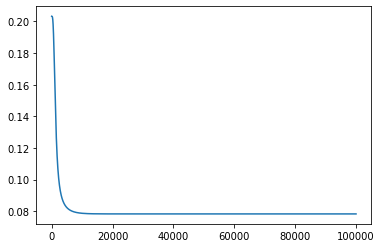

tensor([9.9998e-01, 2.4566e-05], grad_fn=<SoftmaxBackward0>)
tensor([1.0000e+00, 1.2387e-08], grad_fn=<SoftmaxBackward0>)
tensor([0.7019, 0.2981], grad_fn=<SoftmaxBackward0>)
tensor([1.0000e+00, 1.7263e-16], grad_fn=<SoftmaxBackward0>)
tensor([0.7019, 0.2981], grad_fn=<SoftmaxBackward0>)
tensor([1.0000e+00, 1.1475e-17], grad_fn=<SoftmaxBackward0>)
tensor([0.7019, 0.2981], grad_fn=<SoftmaxBackward0>)
tensor([0.7023, 0.2977], grad_fn=<SoftmaxBackward0>)


In [40]:
#1191201088 千葉 竜樹

#課題 パリティビットを予測する3層ニューラルネットワークの出力を2つにし、交差エントロピーを誤差関数とした場合のプログラムを作成しなさい。
#torch.nn.CrossEntropyLoss()の使い方についてはWeb上で調べること。


#パリティビット
#3層
#出力が2つ
#誤差関数が交差エントロピー

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import math

#ソフトマックス関数
#多クラス分類の出力層でよく利用される活性化関数である。一般的にmax関数ではただ一つの出力のみが選ばれるが、ソフトマックス関数は値の差を強調して出力する関数である。
#また、出力の総和が1であることから、確率とみなすことも可能である。
#fi(x)=exi∑iexi

def softmax(x):
  exp = np.exp(x,dtype=torch.float)
  sum_exp = np.sum(exp)
  return exp/sum_exp

#def grad_softmax(x):
#  y = softmax(x)
#  tmp = np.zeros(y.shape)
#  tmp[100] = 1.0
#  return y * (tmp - y)

#パリティビット自体はこれでいいだろう
#もともと3層のはず。
#出力は、3,3,1を3,3,2にすればよいのか？
#それと、yも要素数2にするのか？
#交差エントロピーはtorch.nn.CrossEntropyLoss()使うんだろうか。
#交差エントロピー
#ニューラルネットワークの出力が確率分布とみなせる時、目的の確率分布との差を評価する誤差関数。出力層がSoftmax関数を活性化関数としている場合などに用いられる。
#−∑i=1K{ynilny^ni+(1−yni)ln(1−y^ni)}
#softmax関数が組み込まれている点に注意

#sigmoidを交差エントロピーに変えれば良い？
class MLP(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(MLP, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.l2 = nn.Linear(hidden_size, output_size)
  
  def forward(self, x):
    h = self.l1(x).softmax(0)#中間層は処理する必要？
    return self.l2(h).softmax(0)#出力はそのまま、あとで交差エントロピー法のため？

x = torch.tensor([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]], dtype=torch.float)
y = torch.tensor([[1,0], [0,1], [0,1], [1,0], [0,1], [1,0], [1,0], [0,1]], dtype=torch.float)
#出力層1ビットの場合は、0か1を出力すれば良かったが、今は出力層が2である。
#1,0か0,1を出力させたくて、入力3ビットのうち、1の個数が偶数なら0を出力したい。
#交差エントロピーなので、差を出したいから、もう片方を大きい値にする必要があり、
#合計1にしておくことで、確率的な分布が出てくる。

model = MLP(3, 3, 2)
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-3)
criterion = torch.nn.CrossEntropyLoss()

history = []
max_epoch = 100000
for epoch in range(max_epoch):
  pred = model(x)
  error = criterion(y, pred)
  history.append(error.item())
  model.zero_grad()
  error.backward()
  optimizer.step()

history = np.array(history, dtype=np.float32)
epochs = np.arange(1, max_epoch+1)
plt.plot(epochs, history)
plt.show()

print(model(torch.tensor([0.0,0.0,0.0])))
print(model(torch.tensor([0.0,0.0,1.0])))
print(model(torch.tensor([0.0,1.0,0.0])))
print(model(torch.tensor([0.0,1.0,1.0])))
print(model(torch.tensor([1.0,0.0,0.0])))
print(model(torch.tensor([1.0,0.0,1.0])))
print(model(torch.tensor([1.0,1.0,0.0])))
print(model(torch.tensor([1.0,1.0,1.0])))